<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa_after/PSD_histogram_BEST_sample_08_value_15_run_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [286]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [287]:
Repetir = 60

In [288]:
# New version change routine inside MarquesGabi_Routines
# Try to improve segmentation 
# New routine is called Segment_Filter_revisited_One... Two,Three, etc
# this exemple threshold 0.4

In [289]:
#!pip install mahotas

In [290]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [291]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 485, done.
remote: Counting objects: 100% (235/235), done.
remote: Compressing objects: 100% (232/232), done.
remote: Total 485 (delta 109), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (485/485), 166.45 MiB | 27.25 MiB/s, done.
Resolving deltas: 100% (232/232), done.
Checking out files: 100% (101/101), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado


In [292]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [293]:
Size=1200 # tamanho da foto
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [294]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (222/222), done.
remote: Total 225 (delta 93), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (225/225), 211.77 MiB | 19.38 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (58/58), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines


In [295]:
# Sample7 =[2, 5, 17] # 
# [2, 5, 17] sample 7---  [4,13,25] sample 3----[0, 3, 9] sample 8

In [296]:
FILE='SugarSample08_new.zip'

img_name=[]
x_original = [] 

data_file ='csv'


file_name = zipfile.ZipFile(FILE, 'r')
file_name.extractall()

k = 0
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:] == data_file):
        df_ImgJ =pd.read_csv(name,sep=',' )
        if( k > 0):
          df_old = df_ImgJ.copy()
        #df_ImgJ = pd.read_excel(name)
        df_ImgJ =pd.read_csv(name,sep=',' )
        df_ImgJ = df_ImgJ.drop(labels=[0], axis=0)
        if(k > 0):
          df_ImgJ = pd.concat( [df_ImgJ, df_old], ignore_index = True)
        k = k + 1

In [297]:
df_ImgJ.head()

,Id \t,Area
0,3,1.031
1,4,1.852
2,5,1.530
3,6,1.354
4,7,1.047


In [298]:
name

'sample_08_03.csv'

In [299]:
f.namelist()

['sample_08_01.csv', 'sample_08_02.csv', 'sample_08_03.csv']

In [300]:
#df_ImgJ.head()

In [301]:
#df_ImgJ.head()

In [302]:
from Segment_Filter_Reviseted_2022 import Segmenta  # got image provided segmented

In [303]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (222/222), done.
remote: Total 225 (delta 93), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (225/225), 211.77 MiB | 21.20 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (58/58), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [304]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [305]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [306]:
Img_Size = 28

In [307]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [308]:
# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)


Epoch 1/200
11/11 [==============================] - 3s 161ms/step - loss: 0.5439 - accuracy: 0.7201 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 136ms/step - loss: 0.3377 - accuracy: 0.8455 - val_loss: 0.6933 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 137ms/step - loss: 0.2489 - accuracy: 0.9067 - val_loss: 0.6941 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 135ms/step - loss: 0.1323 - accuracy: 0.9504 - val_loss: 0.6958 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 131ms/step - loss: 0.1113 - accuracy: 0.9621 - val_loss: 0.6968 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 131ms/step - loss: 0.0986 - accuracy: 0.9650 - val_loss: 0.6954 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 132ms/step - loss: 0.0492 - accuracy: 0.9825 - val_loss: 0.6964 - val_accuracy: 0.5102

In [309]:
Y_test = yback(Y_test)

In [310]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict  0   1
Actual        
0        1  71
1        0  75


In [311]:
print(METRICS)

              precision    recall  f1-score   support

           0       1.00      0.01      0.03        72
           1       0.51      1.00      0.68        75

    accuracy                           0.52       147
   macro avg       0.76      0.51      0.35       147
weighted avg       0.75      0.52      0.36       147



In [312]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [313]:
'''
img=ww[4] 
df=Segmenta(img)
df.shape
'''

'\nimg=ww[4] \ndf=Segmenta(img)\ndf.shape\n'

In [314]:
Sample3 =[4,13,25]
Sample7 =[2, 5, 17]
Sample8 =[0, 3, 9]

for i in range(Repetir):
  k = 0
  for i in Sample8:
    img=ww[i]
    if( k > 0):
      df_old = df_ann.copy()
    df_ann=Segmenta(img)
    if(k > 0):
      df_ann = pd.concat( [df_ann, df_old], ignore_index = True)
    k = k + 1
#df_ann = df.copy

df_teste = np.array(df_ann)
names = df_ann.columns
df_teste = pd.DataFrame(df_teste,columns=names)
Width = df_ann['Width']
#del df_ann['Width']
names = df_ann.columns
del df_ann['Width']
result = np.array(df_ann)
result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
prediction= np.argmax(model.predict(result), axis=-1)

In [315]:
df_ann

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,62.970341,83.771530,102.547966,112.072090,115.265457,115.834579,117.267944,118.869232,120.425323,118.777336,111.423958,75.074341,55.152847,54.723362,54.529671,52.334557,50.664650,44.145752,19.048189,18.006662,40.769142,49.753105,50.840988,47.925552,45.510597,43.946167,44.109154,44.443802,58.736298,71.183006,95.034081,105.705002,108.277924,111.813629,112.507996,111.963707,109.617783,94.595161,67.133827,58.652206,...,64.692749,62.019958,61.444618,59.650589,61.218971,66.487350,64.787262,63.228920,72.020813,79.512215,81.904495,80.186134,102.014252,75.305008,73.209534,70.458794,72.485931,74.240211,77.418793,79.399055,80.737373,78.754318,62.412849,31.682163,40.015049,51.273735,53.267071,58.105267,59.154526,59.157211,59.649273,61.964668,61.574986,62.264336,61.886688,63.654568,71.310135,73.073196,72.361946,73.533188
1,68.866005,70.016075,74.809509,76.507912,79.482910,81.535019,80.872330,80.048859,81.499069,83.569031,86.838974,87.242020,86.643456,85.490143,83.903580,84.243973,85.196259,87.929466,93.737679,99.947411,99.445824,97.718369,98.254684,97.977112,100.985397,104.047310,105.120926,100.579903,69.690933,69.695969,74.257927,75.339172,77.733383,79.697510,79.743523,80.882561,82.127258,83.764465,85.805779,88.545013,...,53.536968,50.751808,48.934746,48.669834,48.285934,44.386253,41.658794,42.549789,43.772583,43.746284,42.236343,42.238613,95.729889,96.995529,95.378868,97.150482,98.924431,99.648407,99.433975,98.904144,100.368073,104.658630,105.823959,104.033195,89.141144,51.290478,53.064117,60.880692,57.467331,52.758297,48.891731,49.167030,48.312874,45.757568,43.501663,42.720070,42.749779,43.254608,42.682087,41.052349
2,74.541855,77.197350,77.447563,76.857224,76.943375,77.260551,80.253578,80.680397,78.576317,76.620483,74.277626,74.601067,74.906960,77.199707,78.934525,79.728020,83.402542,85.579056,84.766235,86.283813,85.746338,85.820732,82.470749,80.117073,81.095779,84.205658,84.351089,84.063828,75.831238,77.174789,78.447647,77.821907,76.799904,76.317009,78.902809,81.670921,78.701157,77.300728,76.273239,76.890198,...,119.725349,115.870239,98.228523,68.433861,62.126167,61.043385,60.912601,61.888561,63.379669,64.309265,64.555565,65.872498,96.171036,97.160942,99.159058,103.320076,103.541389,101.646957,99.744461,102.791214,106.837341,110.062340,111.141907,112.528862,114.872040,112.647278,113.444283,117.425949,119.645615,114.340744,97.260551,67.910408,61.481319,60.590572,60.768814,62.180828,64.258354,65.523773,66.550079,67.184120
3,89.642189,93.087898,90.614471,83.193352,55.474072,49.967018,49.566750,52.156815,57.174042,60.705017,65.170807,69.959511,67.563560,59.660900,51.402847,48.544357,48.246799,45.412231,46.202415,52.991871,65.610588,78.895958,83.734978,82.824364,82.170418,81.181343,80.540451,81.206032,87.064514,88.004219,86.132401,80.664635,55.984142,48.854706,49.655087,53.390175,57.171520,59.159336,61.977062,65.517586,...,95.929825,92.381927,85.940849,85.247185,81.397530,80.074837,80.692444,80.241096,81.226219,80.454536,75.129814,67.572624,54.779964,56.482574,58.005974,58.367130,58.309410,57.747101,53.754181,49.496838,44.778603,37.475334,31.450369,32.137558,55.624306,81.334373,89.720657,93.704956,95.306282,99.070778,100.537933,95.491791,80.234505,80.337776,80.185448,80.279503,79.910339,77.236870,69.496681,59.279831
4,66.831833,69.639351,72.173431,74.706398,75.590408,73.067207,68.612312,65.076782,63.552784,62.925121,64.464455,65.685005,68.734169,74.314850,79.971512,84.992325,87.115417,86.804375,80.497986,65.737968,49.158524,35.604424,30.820295,27.030827,20.656073,7.615239,2.312514,0.840237,66.415009,67.310608,70.689026,72.856163,71.696182,67.292351,61.592812,58.677040,59.008987,60.615818,62.127838,64.691360,...,69.213531,71.169411,69.937698,63.183067,33.545837,2.33976

In [316]:
df_teste.shape # por que esta saindo 100 ???????

(150, 785)

In [317]:
#df_ann

In [318]:
img_graos = []
Width_new = []
k = 0
for i in prediction:
  if( i == 0):
    img_graos.append(df_teste.iloc[k,:])
    Width_new.append(Width.iloc[k])

  k = k +1

img_graos = pd.DataFrame(img_graos, columns=names )


In [319]:
img_graos.shape

(94, 785)

In [320]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [321]:
img_graos.shape

(94, 785)

In [322]:
Width=np.array(Width_new)

In [323]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

#from Get_PSDArea_Revival import PSDArea
from Get_PSDArea_Reviseted_2022_value_15 import PSDArea
from histogram_fev_2021 import PSD
#from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 915, done.
remote: Counting objects: 100% (676/676), done.
remote: Compressing objects: 100% (674/674), done.
remote: Total 915 (delta 446), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (915/915), 6.58 MiB | 8.79 MiB/s, done.
Resolving deltas: 100% (583/583), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [324]:

#!git clone https://github.com/ucfilho/marquesgabi_out_2020
#%cd marquesgabi_out_2020
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

PSD_imageJ = 'Amostra8.csv' 
PSD_new = pd.read_csv(PSD_imageJ, sep=';')
print(PSD_new.head(3))
''''''

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (222/222), done.
remote: Total 225 (delta 93), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (225/225), 211.77 MiB | 20.53 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (58/58), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines
   I

''

In [325]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [326]:
Width.shape

(94,)

In [327]:
Width

array([191, 111, 113, 135, 185, 194, 126, 132, 147, 195, 152, 121, 145,
       178, 167, 132, 108, 138, 164, 183, 200, 137, 115, 176, 170, 163,
       199, 172, 136, 125, 137, 159, 178, 140, 160, 169, 148, 110, 192,
       142, 165, 141, 153, 192, 171, 170, 100, 148, 188, 133, 141, 122,
       164, 138, 155, 145, 197, 162, 188, 120, 184, 160, 113, 175, 105,
       101, 194, 159, 154, 169, 147, 156, 180, 154, 198, 148, 200, 126,
       172, 191, 190, 174, 122, 111, 144, 153, 196, 114, 180, 177, 156,
       193, 147, 197])

In [328]:
img_graos.shape

(94, 785)

In [329]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,191.0,62.970341,83.771530,102.547966,112.072090,115.265457,115.834579,117.267944,118.869232,120.425323,118.777336,111.423958,75.074341,55.152847,54.723362,54.529671,52.334557,50.664650,44.145752,19.048189,18.006662,40.769142,49.753105,50.840988,47.925552,45.510597,43.946167,44.109154,44.443802,58.736298,71.183006,95.034081,105.705002,108.277924,111.813629,112.507996,111.963707,109.617783,94.595161,67.133827,...,64.692749,62.019958,61.444618,59.650589,61.218971,66.487350,64.787262,63.228920,72.020813,79.512215,81.904495,80.186134,102.014252,75.305008,73.209534,70.458794,72.485931,74.240211,77.418793,79.399055,80.737373,78.754318,62.412849,31.682163,40.015049,51.273735,53.267071,58.105267,59.154526,59.157211,59.649273,61.964668,61.574986,62.264336,61.886688,63.654568,71.310135,73.073196,72.361946,73.533188
1,111.0,68.866005,70.016075,74.809509,76.507912,79.482910,81.535019,80.872330,80.048859,81.499069,83.569031,86.838974,87.242020,86.643456,85.490143,83.903580,84.243973,85.196259,87.929466,93.737679,99.947411,99.445824,97.718369,98.254684,97.977112,100.985397,104.047310,105.120926,100.579903,69.690933,69.695969,74.257927,75.339172,77.733383,79.697510,79.743523,80.882561,82.127258,83.764465,85.805779,...,53.536968,50.751808,48.934746,48.669834,48.285934,44.386253,41.658794,42.549789,43.772583,43.746284,42.236343,42.238613,95.729889,96.995529,95.378868,97.150482,98.924431,99.648407,99.433975,98.904144,100.368073,104.658630,105.823959,104.033195,89.141144,51.290478,53.064117,60.880692,57.467331,52.758297,48.891731,49.167030,48.312874,45.757568,43.501663,42.720070,42.749779,43.254608,42.682087,41.052349
2,113.0,74.541855,77.197350,77.447563,76.857224,76.943375,77.260551,80.253578,80.680397,78.576317,76.620483,74.277626,74.601067,74.906960,77.199707,78.934525,79.728020,83.402542,85.579056,84.766235,86.283813,85.746338,85.820732,82.470749,80.117073,81.095779,84.205658,84.351089,84.063828,75.831238,77.174789,78.447647,77.821907,76.799904,76.317009,78.902809,81.670921,78.701157,77.300728,76.273239,...,119.725349,115.870239,98.228523,68.433861,62.126167,61.043385,60.912601,61.888561,63.379669,64.309265,64.555565,65.872498,96.171036,97.160942,99.159058,103.320076,103.541389,101.646957,99.744461,102.791214,106.837341,110.062340,111.141907,112.528862,114.872040,112.647278,113.444283,117.425949,119.645615,114.340744,97.260551,67.910408,61.481319,60.590572,60.768814,62.180828,64.258354,65.523773,66.550079,67.184120
3,135.0,89.642189,93.087898,90.614471,83.193352,55.474072,49.967018,49.566750,52.156815,57.174042,60.705017,65.170807,69.959511,67.563560,59.660900,51.402847,48.544357,48.246799,45.412231,46.202415,52.991871,65.610588,78.895958,83.734978,82.824364,82.170418,81.181343,80.540451,81.206032,87.064514,88.004219,86.132401,80.664635,55.984142,48.854706,49.655087,53.390175,57.171520,59.159336,61.977062,...,95.929825,92.381927,85.940849,85.247185,81.397530,80.074837,80.692444,80.241096,81.226219,80.454536,75.129814,67.572624,54.779964,56.482574,58.005974,58.367130,58.309410,57.747101,53.754181,49.496838,44.778603,37.475334,31.450369,32.137558,55.624306,81.334373,89.720657,93.704956,95.306282,99.070778,100.537933,95.491791,80.234505,80.337776,80.185448,80.279503,79.910339,77.236870,69.496681,59.279831
5,185.0,55.363800,56.906174,59.237194,62.558453,66.878685,68.314774,69.620567,71.406624,80.559296,86.315910,84.171974,87.411591,93.449814,85.043503,81.440445,79.515175,74.921631,57.605343,30.558685,32.611977,46.421150,59.161255,61.293941,64.865479,66.717339,65.005020,65.516525,64.792488,54.172913,52.768089,54.818489,58.706238,64.471146,65.408997,65.842102,70.663490,78.880875,79.786407,85.591347,...,1.105595,4.073952,0.703229,0.433426,0.771220,1.137034,0.974346,1.465800

In [330]:
PSD_new['Area']

0     0.807
1     1.407
2     1.177
3     1.289
4     1.743
      ...  
94    2.097
95    1.871
96    1.315
97    1.034
98    2.095
Name: Area, Length: 99, dtype: float64

In [331]:
 df_ImgJ

,Id \t,Area
0,3,1.031
1,4,1.852
2,5,1.530
3,6,1.354
4,7,1.047
...,...,...
74,37,0.901
75,38,1.165
76,39,1.264
77,40,1.021


In [332]:
# 
Area = df_ImgJ['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]



In [333]:
len(Diameter_All)

94

In [334]:
#

#PSD_new['Area'].shape

In [335]:
#PSD_new.iloc[:,0]

In [336]:
'''
Area2 = PSD_new['Area'].values
#k = 0
for A in Area2:
  Diam1.append((4*A/np.pi)**0.5)
  #k = k + 1 
'''

"\nArea2 = PSD_new['Area'].values\n#k = 0\nfor A in Area2:\n  Diam1.append((4*A/np.pi)**0.5)\n  #k = k + 1 \n"

In [337]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


In [338]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93
0,1.145736,1.535591,1.395728,1.312999,1.154592,1.611253,1.292967,1.107307,1.694073,1.202134,1.199484,1.140724,1.484151,1.600947,1.619922,1.570435,1.303754,1.395728,1.476410,1.370876,1.354525,1.255496,1.378748,1.374123,1.410248,1.915588,1.039702,1.383358,1.487151,0.962105,1.454253,1.417003,1.194697,1.668705,1.071069,1.217918,1.268611,1.140166,1.385657,1.620315,...,1.619922,1.570435,1.303754,1.395728,1.476410,1.370876,1.354525,1.255496,1.378748,1.374123,1.410248,1.915588,1.039702,1.383358,1.487151,0.962105,1.454253,1.417003,1.194697,1.668705,1.071069,1.217918,1.268611,1.140166,1.385657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.415367,0.779102,0.943477,0.977060,1.469452,1.781381,1.023721,0.908005,1.104657,1.681812,1.297151,0.909276,0.957642,1.358209,1.151125,1.156201,0.841806,0.955120,1.102298,1.184081,1.518403,1.011604,0.829210,1.266673,1.435161,1.024818,1.580654,1.288059,1.090202,0.882554,0.982276,1.200997,1.224431,1.044774,1.082343,1.558973,0.979635,0.941234,1.486920,1.175630,...,1.194518,0.796609,1.475277,1.146021,1.301178,0.879725,1.557589,1.318997,0.696317,1.235575,0.771153,0.854981,1.119466,1.233353,1.496590,1.287378,1.129145,1.131143,1.307580,1.236363,1.562972,1.073136,1.431262,0.770428,1.434081,1.574553,1.320355,1.390584,0.818233,0.623436,1.026583,1.107334,1.397293,0.928952,1.26091,1.217552,1.037167,1.324879,1.136574,1.385461


In [339]:
len(Diameter_All)

94

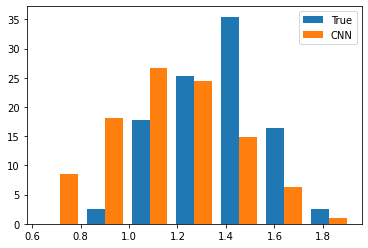

In [340]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [341]:
print('ImgJ:','media=',np.mean(np.array(Diam1)),'desvio=',np.std(np.array(Diam1)),'pontos=',len(Diam1))

ImgJ: media= 1.3621288326512706 desvio= 0.20110347688312627 pontos= 79


In [342]:
print('Software:','media=',np.mean(np.array(Diameter_All)),'desvio=',np.std(np.array(Diameter_All)),'pontos=',len(Diameter_All))

Software: media= 1.1624476419456673 desvio= 0.2469469590456999 pontos= 94
